# Indexing & resampling time series


In [46]:
#import
import pandas as pd 
from datetime import datetime #
import numpy as np
import matplotlib.pyplot as plt

In [47]:
#read_data
google = pd.read_csv('../datasets/google.csv')
google.head()

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10


In [48]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1094 non-null   object 
 1   Close   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [49]:
google.isnull().sum()

Date       0
Close    338
dtype: int64

In [50]:
google.dropna(inplace=True)

In [51]:
google.isnull().sum()

Date     0
Close    0
dtype: int64

In [52]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    756 non-null    object 
 1   Close   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.7+ KB


In [53]:
google.head()

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
4,2014-01-06,558.10
5,2014-01-07,568.86
6,2014-01-08,570.04


### Converting string dates to datetime64


In [54]:
google.Date = pd.to_datetime(google.Date)
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    756 non-null    datetime64[ns]
 1   Close   756 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.7 KB


set_index() :    Date into index <br>
inplace :         don't create copy

In [55]:
google.set_index("Date" , inplace=True)

In [56]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


### Plotting the Google stock time series


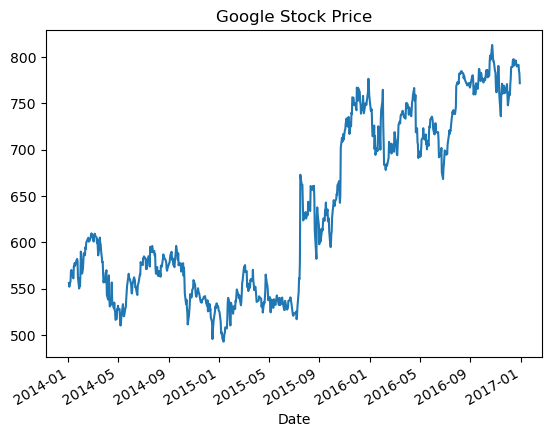

In [57]:
google.Close.plot(title='Google Stock Price')
#plt.tight_layout()
plt.style.use('bmh')
plt.show()

### Partial string indexing


In [58]:
google.index[0]

Timestamp('2014-01-02 00:00:00')

In [59]:
google['2015-3':'2016-2'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-03-02 to 2016-02-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [60]:
google.loc['2016-06-01' , 'Close']

734.15

### .asfreq(): set frequency


In [61]:
google.asfreq('D').info() # set calendar day frequency


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


In [62]:
google.asfreq('M').head()

,Close
Date,
2014-01-31,589.89
2014-02-28,607.22
2014-03-31,556.70
2014-04-30,526.66
2014-05-31,NaN


In [64]:
google['2015'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-01-02 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


C:\Users\DELL\AppData\Local\Temp\ipykernel_8820\2423233360.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  google['2015'].info()


## Exercise


### Create a time series of air quality data


In [66]:
data = pd.read_csv('nyc.csv')

# Inspect data
print(data.info())

# Convert the date column to datetime64
data.date = pd.to_datetime(data.date)

# Set date column as index
data.set_index('date' , inplace=True)

# Inspect data 
print(data.info())

# Plot data
data.plot(subplots=True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'nyc.csv'

### Compare annual stock price trends


In [ ]:
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014' , '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices

prices.plot()
plt.show()

### Set and change time series frequency


In [ ]:
# Inspect data
print(co.info())

# Set the frequency to calendar daily
co = co.asfreq('D')

# Plot the data


co.plot(subplots=True);

# Set frequency to monthly
co = co.asfreq('M')

# Plot the data
co.plot(subplots=True)
plt.show()

